# Задание

1. Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
2. Оставьте два признака - sepal_length и sepal_width и целевую переменную
3. Разделите данные на выборку для обучения и тестирования
4. Постройте модель LDA
5. Визуализируйте предсказания для тестовой выборки и центры классов (разделяющую плоскость можно не строить, но обратите внимание, что класса 3).
6. Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
7. Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [105]:
# 1. Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
from sklearn.datasets import load_iris

iris = load_iris()


In [106]:
# 2. Оставьте два признака - sepal_length и sepal_width и целевую переменную

import pandas as pd

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"] = iris.target
df = df[["sepal length (cm)", "sepal width (cm)", "target"]]
display(df)

,sepal length (cm),sepal width (cm),target
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


In [107]:
# 3. Разделите данные на выборку для обучения и тестирования

from sklearn.model_selection import train_test_split

X = df[["sepal length (cm)", "sepal width (cm)"]]
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

In [110]:
# 4. Постройте модель LDA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

y_pred = lda.predict(X_test)
y_pred_proba = lda.predict_proba(X_test)
print('accuracy:')
lda.score(X_test, y_test)

accuracy:


0.7555555555555555

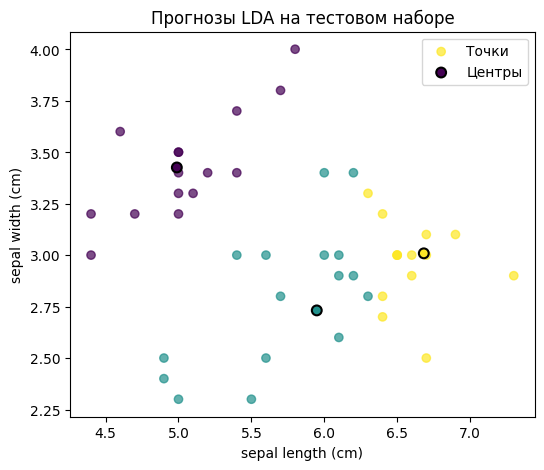

In [109]:
# 5. Визуализируйте предсказания для тестовой выборки и центры классов

import matplotlib.pyplot as plt
import numpy as np

y_pred = lda.predict(X_test)

plt.figure(figsize=(6, 5))

plt.scatter(
    X_test["sepal length (cm)"],
    X_test["sepal width (cm)"],
    c = y_pred,
    cmap="viridis",
    alpha=0.7,
    label="Точки"
)

centers = lda.means_
plt.scatter(
    centers[:, 0],
    centers[:, 1],
    c=np.arange(len(centers)),
    cmap="viridis",
    marker=".",
    s=200,
    edgecolor="k",
    linewidth=1.5,
    label="Центры"
)

plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.title("Прогнозы LDA на тестовом наборе")
plt.legend()
# plt.grid(True)
plt.show()


In [96]:
# 6. Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width

df_features = df[["sepal length (cm)", "sepal width (cm)"]].copy()

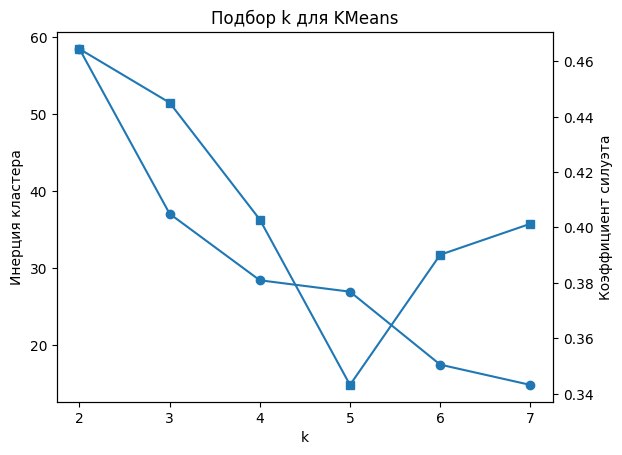

Лучшее k по силуэту: 2


In [111]:
# 7. Подберите оптимальное число кластеров для алгоритма kmeans

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

X = df_features.values  # только sepal_length и sepal_width

ks = range(2, 8)
inertias = []
silhouettes = []

for k in ks:
    km = KMeans(n_clusters=k, random_state=42, n_init="auto")
    labels = km.fit_predict(X)
    inertias.append(km.inertia_)
    silhouettes.append(silhouette_score(X, labels))

fig, ax1 = plt.subplots()
ax1.plot(ks, inertias, marker="o")
ax1.set_xlabel("k")
ax1.set_ylabel("Инерция кластера")
ax2 = ax1.twinx()
ax2.plot(ks, silhouettes, marker="s")
ax2.set_ylabel("Коэффициент силуэта")
plt.title("Подбор k для KMeans")
plt.show()

best_k = ks[int(np.argmax(silhouettes))]
print("Лучшее k по силуэту:", best_k)

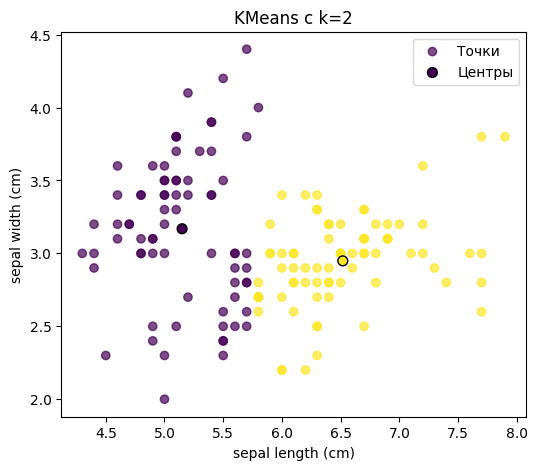

In [112]:
# ...и визуализируйте полученную кластеризацию

km = KMeans(n_clusters=best_k, random_state=42, n_init="auto")
labels = km.fit_predict(X)

plt.figure(figsize=(6, 5))
plt.scatter(
    df_features.iloc[:, 0],
    df_features.iloc[:, 1],
    c=labels,
    cmap="viridis",
    alpha=0.7,
    label="Точки"
)
plt.scatter(
    km.cluster_centers_[:, 0],
    km.cluster_centers_[:, 1],
    c=np.arange(km.cluster_centers_.shape[0]),
    marker=".",
    s=200,
    edgecolor="k",
    label="Центры"
)
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.title(f"KMeans с k={best_k}")
plt.legend()
plt.show()